# Data 512 Final Project: Measuring political polarization in United States Congressional roll-call votes over the last 2000-2020

# Motivation & Problem Statement

## Goal
This project will analyze the polarization of Congress according to roll-call vote data from 2000-2020. The two goals will be:
   
   1. Identification of trends over time in polarization.
   2. Identification of correlation between topics and polarization
   
Identifying trends in polarization over time and polarization of topics may provide insight into the causal factors of polarization and how to best treat them.

## Why is it important?
Political polarization has been a topic covered by multiple media sources in the past four years. [Articles](https://greatergood.berkeley.edu/article/item/what_is_the_true_cost_of_polarization_in_america) have suggested that increased polarization could reach deeply into people's everyday lives through their personal interactions, and even impact their physical health. Beyond that, political polarization in Congress could have legislative impact, such as the [ping-poing effect on energy regulation](https://www.spglobal.com/platts/en/market-insights/latest-news/coal/102320-us-elections-political-polarization-creating-regulatory-ping-pong-effect-for-us-energy). Both the legislative and individual impact highlight the importance of political polarization at the human-level.

## Why we don't know about this or what's the contribution of this analysis?
A few Google searches have not found substantial walkthroughs or approachable analysis of roll-call vote data to measure political polarization. Many articles represent congresspeople through ideological scores (e.g., [NYT](https://www.nytimes.com/2014/06/12/upshot/polarization-is-dividing-american-society-not-just-politics.html), [Pew](https://www.pewresearch.org/fact-tank/2014/06/12/polarized-politics-in-congress-began-in-the-1970s-and-has-been-getting-worse-ever-since/)) or [polling data](https://fivethirtyeight.com/features/how-hatred-negative-partisanship-came-to-dominate-american-politics/). The use of a roll-call vote would be an alternative measurement of the polarization, with the following potential benefits:

   1. The data is easily accessible. Others may re-create the analysis on polarization, as compared to the survey or idealogical score data referenced above.
   2. The roll-call vote is a direct outcome of legislative intent compared to ideological score or survey data. If polarization exists outside of legislative votes, but not within legislative votes, then it may not have real impact on legislative outcomes.

## Human-centered aspect of the project
The problem itself, as mentioned in "Why is it important?" is related to a topic which can both directly impact humans (e.g., through physical health) and more indirectly impact humans through legislative outcomes. 

In addition to this, the visualization and data representation itself will require human-centered design.

# Data
We will use the open-sourced [congress GitHub](https://github.com/unitedstates/congress) set of scrapers to download Congressional roll-call vote data from 2000-2020. More specifically, we'll utilize the [votes data](https://github.com/unitedstates/congress/wiki/votes) which contains data on Congress roll-call votes.

From the project:

> This project collects data on roll call votes, which are the sorts of votes in which the individual positions of legislators is recorded. Other sorts of votes such as unanimous consent requests and voice votes are not collected here.
> 
> Congress publishes roll call vote data in XML starting in 1990 (101st Congress, 2nd session) for the House and 1989 (101st Congress, 1st Session) for the Senate. Senate votes are numbered uniquely by session. Sessions roughly follow calendar years, and there are two sessions per Congress. House vote numbering continues consecutively throughout the Congress.

NOTE: despite what the source says, there were errors getting data before 2000, as such we truncated the dataset for this analysis.

The dataset schema is similar to what follows (maybe updated depending on whether or not I pull in additional data from the scraper):

| Name | Description | Example Value |
| ----- | ----------------------| ------ |
| chamber | Either "h" for House or "s" for Senate | "h" |
| congress | Number of the Congress which carried out this vote | 112 |
| date | The date the roll-call vote happened | "2013-07-18T22:40:39-04:00" |
| number | The number of the vote | 202 |
| session | The year that Congress carried out this vote | 2013 |
| source_url | The source url for the data | "http://clerk.house.gov/evs/2013/roll202.xml"
| updated_at | The date that the data was updated at | "2013-07-18T22:40:39-04:00" |
| vote_id | The vote id of the roll-call vote | "h202-113.2013" |
| category | The type of roll-call vote | "amendment" |
| question | The question that the roll-call vote is on | "On Agreeing to the Amendment: Amendment 24 to H R 2217" |
| type | The type of vote this is | "On the Amendment" |
| requires | The fraction of the vote required to pass | "1/2" |
| result | The result of the roll-call vote | "failed" |
| result_text | The result of the vote (this is just a duplicate field according to the documentation) | "Failed" |
| display_name | Congress person's display name | "John Jay" |
| party | "D" for Democrat, "R" for Republican | "R" |
| state | Two-letter state abbreviation of the state that the congressperson represents | "NC"

## Data preparation
I have used  [code/scripts/get_votes.ps1](code/scripts/get_votes.ps1) to download the data for multiple Congresses.

The dataset is rather large and takes an additional Python script to get the data into a dataframe format. It may be reasonable to precompute aggregations (e.g., by year or month) for some portions of the data to be able to visualize and play with it faster.

Futhermore some of the downloaded data appears to have run into errors a few times, so I may need to shorten the length of analysis to simplify dealing with substantial missing values.

We will denormalize the data to ease analysis into the following format:

| Name | Description | Example Value |
| ----- | ----------------------| ------ |
| chamber | Either "h" for House or "s" for Senate | "h" |
| congress | Number of the Congress which carried out this vote | 112 |
| date | The date the roll-call vote happened | "2013-07-18T22:40:39-04:00" |
| number | The number of the vote | 202 |
| session | The year that Congress carried out this vote | 2013 |
| source_url | The source url for the data | "http://clerk.house.gov/evs/2013/roll202.xml"
| updated_at | The date that the data was updated at | "2013-07-18T22:40:39-04:00" |
| vote_id | The vote id of the roll-call vote | "h202-113.2013" |
| category | The type of roll-call vote | "amendment" |
| question | The question that the roll-call vote is on | "On Agreeing to the Amendment: Amendment 24 to H R 2217" |
| type | The type of vote this is | "On the Amendment" |
| requires | The fraction of the vote required to pass | "1/2" |
| result | The result of the roll-call vote | "failed" |
| result_text | The result of the vote (this is just a duplicate field according to the documentation) | "Failed" |
| display_name | Congress person's display name | "John Jay" |
| party | "D" for Democrat, "R" for Republican | "R" |
| state | Two-letter state abbreviation of the state that the congressperson represents | "NC"



# Unknowns
<ol>
    <li>Some Congresses have incomplete voting data through the scrapers, should we throw out these years or use the partial data. If so, how?</li>
    <li>How should we consider party identification of independents or parties outside the two-party system?</li>
</ol>

# Research Questions
<ol>
    <li>Are there trends in the mean difference in roll-call votes over the years of 2000-2020?</li>
    <li>If topic areas of bills can be easily automatically identified, are there particular topic areas or types of bills that have greater mean differences in votes by party-identification than others?</li>
</ol>

## Hypotheses
   NOTE: both of these are included at the suggestion of the rubric and in order to provide a more specific context to focus on -- but the main questions will be exploratory.
  1. <b>The mean difference in votes by party identification has remained relatively stable over time.</b> There are many roll-call votes which are related to on-going legislation.
  2. <b>The 90th percentile of difference in votes by party identification increases over time.</b>In other words, the extremes of voting are more extreme over the years but the center of the distribution (as mentioned in point (1)) does not change substantially.
  

# Background or related work
> NOTE: TO-DO fix footnotes here for some reason they're broken!

Background work suggests the following about the design and methodology of this project:
  1. There are heterogenuous effects of the topic of the bill [^1] on the partisianship of the vote for the bill.
  2. Since each Congress votes on different topics [^1], we may have to control  for the topics voted on in a particular Congress to understand the trend in partisanship across years of Congress. There is also prior work on identifying topics in speech which could be particularly divisive [^2][^3]
  3. Partisanship has increased in the last 3 decades[^4].
  
# Limitations
We likely will not be able to address the following topics due to time constraints:

   1. Normalizing the comparison of roll-call vote partisanship over time by the topic areas of bills across years.
   2. Pulling data for before 2020 Congresses

# Methodology
The following methodologies will be utilized:

| Research Question # | Methodology | Summary of Application | Expected outcome of method |
| -- | ------------------ | ------------------ | ------------------------- |
| 1 | Plotting and visualization using Seaborn & Matplotlib | We will use plots and graphs to provide a view of the time series of mean difference in roll-call vote. | A visual with a clear depiction of trend over time of mean difference in roll-call vote |
| 1 | ARIMA / regression | We will utilize a simple ARIMA or regression analysis to identify a trendline which estimates the mean change per year or month in mean difference in roll-call vote | An estimate of whether polarization is increasing or decreasing over time |
| 2 | Count of Top-K key phrases using nltk by question | We'll extract the top-k key phrases of the "question" field per vote, and then measure the mean difference in roll-call vote by topic area. | An approximate measure of the polarization by topic area |
 



# Appendix

## Some notes on References
[This paper discusses methods to identify topics in speech](https://www.brown.edu/Research/Shapiro/pdfs/politext.pdf) and polarization of particular topics of speech. Brookings also has a paper which [discusses the polarization of speech](https://www.brookings.edu/wp-content/uploads/2012/09/2012b_Jensen.pdf) specifically. 
<br/><br/>
[This article finds rising polarization](https://scholar.harvard.edu/files/rogowski/files/npat-paper-july2019.pdf) and discusses a common methodology, DW-Nominate scores. It also mentions that in order to isolate polarization from other factors (e.g., # of votes of a particular Congressmen; topics they've voted on; etc). So the literature points towards potential variance in topics by Congressional year.
<br/><br/>
This [Pew ideological scoring of Congressmen, shows a clear shift between 1970 to 2012](https://www.pewresearch.org/fact-tank/2014/06/12/polarized-politics-in-congress-began-in-the-1970s-and-has-been-getting-worse-ever-since/), suggesting that polarization could be identifiable in general political beliefs of Congressmen.


# References
[^1]: [Parsing Party Polarization in Congress](https://scholar.harvard.edu/files/rogowski/files/npat-paper-july2019.pdf)

[^2]: [MEASURING GROUP DIFFERENCES IN HIGH-DIMENSIONAL CHOICES:METHOD AND APPLICATION TO CONGRESSIONAL SPEECH](https://www.brown.edu/Research/Shapiro/pdfs/politext.pdf)

[^3]: [Political Polarization and the Dynamics of Political Language: Evidence from 130 Years of Partisan Speech](https://www.brookings.edu/wp-content/uploads/2012/09/2012b_Jensen.pdf)

[^4]: [Pew: The polarized Congress of today has its roots in the 1970s](https://www.pewresearch.org/fact-tank/2014/06/12/polarized-politics-in-congress-began-in-the-1970s-and-has-been-getting-worse-ever-since/)


# Code

# Parsing the data downloaded from the congress api


In [33]:
import json
import pandas as pd

def get_safe(json, root_key, key):
    if key in json[root_key].keys():
        json[f"{root_key}_{key}"] = json[root_key][key]

def flatten_key(json, key):
    for k,v in json[key].items():
        get_safe(json, key, k)
    del json[key]


def read_to_df(file_name, debug=False):
    parties=["D","R","I"]
    with open(file_name, "r") as file:
        f = json.load(file)
        if f["category"] == "leadership":
            return pd.DataFrame()
        res = {}
        is_senate = f["chamber"] == "s"
        if debug:
            display(f)
        vp_tie_breaker=False
        if "bill" in f.keys():
            flatten_key(f, "bill")
        if "amendment" in f.keys():
            flatten_key(f, "amendment")
        if "treaty" in f.keys():
            flatten_key(f, "treaty")
        for k,v in f["votes"].items():
            try:
                if len(v)==0:
                    # Deal with cases where there are no votes in a category.
                    counts = {"Count":{}}
                else:
                    if is_senate and "VP" in v:
                        vp_tie_breaker=True
                        v.remove("VP") # remove VP if it exists -- we're interested in congressional votes.
                    counts = pd.DataFrame(v).groupby("party")["id"].agg(Count="count").to_dict()
                for party in parties:
                    vote_dict_key = f"vote_{k}_{party}"
                    if party not in counts["Count"].keys():
                        f[vote_dict_key]=0
                    else:
                        f[vote_dict_key]=counts["Count"][party]
            except:
                print(f"Exception in : {k}")
                raise
        del f["votes"]
        if "nomination" in f.keys():
            f["nomination_number"] = f["nomination"]["number"]
            f["nomination_title"] = f["nomination"]["title"]
            del f["nomination"]
        f["vp_tie_breaker"]="Yes" if vp_tie_breaker else "No"
        f["file_name"] = file_name
        return pd.DataFrame(f, index=[0])

read_to_df("data\\data\\101\\votes\\1989\\s100\\data.json", debug=True)

{'amendment': {'number': 225,
  'purpose': 'To make certain provisions unseverable.',
  'type': 's'},
 'bill': {'congress': 101,
  'number': 5,
  'title': 'Act for Better Child Care Services of 1989',
  'type': 's'},
 'category': 'procedural',
 'chamber': 's',
 'congress': 101,
 'date': '1989-06-23T15:16:00-04:00',
 'number': 100,
 'question': 'On the Motion to Table S.Amdt. 225 to S. 5 (Act for Better Child Care Services of 1989)',
 'requires': '1/2',
 'result': 'Motion to Table Agreed to',
 'result_text': 'Motion to Table Agreed to (62-36)',
 'session': '1989',
 'source_url': 'http://www.senate.gov/legislative/LIS/roll_call_votes/vote1011/vote_101_1_00100.xml',
 'subject': 'Motion To Table S.Amdt. No. 225',
 'type': 'On the Motion to Table S.Amdt. 225 to S. 5 (Act for Better Child Care Services of 1989)',
 'updated_at': '2020-11-20T17:28:03-05:00',
 'vote_id': 's100-101.1989',
 'votes': {'Nay': [{'display_name': 'Boschwitz (R-MN)',
    'first_name': 'Rudy',
    'id': 'S135',
    'las

,category,chamber,congress,date,number,question,requires,result,result_text,session,...,vote_Not Voting_R,vote_Not Voting_I,vote_Present_D,vote_Present_R,vote_Present_I,vote_Yea_D,vote_Yea_R,vote_Yea_I,vp_tie_breaker,file_name
0,procedural,s,101,1989-06-23T15:16:00-04:00,100,On the Motion to Table S.Amdt. 225 to S. 5 (Ac...,1/2,Motion to Table Agreed to,Motion to Table Agreed to (62-36),1989,...,1,0,0,0,0,53,9,0,No,data\data\101\votes\1989\s100\data.json


In [43]:
import glob

files_to_read = glob.glob("data\\data\\**\\**\\**\\**\\*.json")
display(files_to_read)

['data\\data\\101\\votes\\1989\\s1\\data.json',
 'data\\data\\101\\votes\\1989\\s10\\data.json',
 'data\\data\\101\\votes\\1989\\s100\\data.json',
 'data\\data\\101\\votes\\1989\\s101\\data.json',
 'data\\data\\101\\votes\\1989\\s102\\data.json',
 'data\\data\\101\\votes\\1989\\s103\\data.json',
 'data\\data\\101\\votes\\1989\\s104\\data.json',
 'data\\data\\101\\votes\\1989\\s105\\data.json',
 'data\\data\\101\\votes\\1989\\s106\\data.json',
 'data\\data\\101\\votes\\1989\\s107\\data.json',
 'data\\data\\101\\votes\\1989\\s108\\data.json',
 'data\\data\\101\\votes\\1989\\s109\\data.json',
 'data\\data\\101\\votes\\1989\\s11\\data.json',
 'data\\data\\101\\votes\\1989\\s110\\data.json',
 'data\\data\\101\\votes\\1989\\s111\\data.json',
 'data\\data\\101\\votes\\1989\\s112\\data.json',
 'data\\data\\101\\votes\\1989\\s113\\data.json',
 'data\\data\\101\\votes\\1989\\s114\\data.json',
 'data\\data\\101\\votes\\1989\\s115\\data.json',
 'data\\data\\101\\votes\\1989\\s116\\data.json',
 'da

In [44]:
def process_df(file_name, i, total_length):
    if i % 2000 == 0:
        print(f"{i * 100.0 / total_length}% done")
    try:
        return read_to_df(file_name)
    except Exception as e:
        print(f"file: {file_name}. {str(e)}")
        raise e

list_of_dfs = [process_df(files_to_read[i], i, len(files_to_read)) for i in range(len(files_to_read))]
df = pd.concat(list_of_dfs, ignore_index=True)

0.0% done
8.852299384765193% done
17.704598769530385% done
26.556898154295578% done
35.40919753906077% done
44.261496923825966% done
53.113796308591155% done
61.96609569335635% done
70.81839507812154% done
79.67069446288673% done
88.52299384765193% done
97.37529323241712% done


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # This is added back by InteractiveShellApp.init_path()


In [45]:
df.head(5)

,amendment_author,amendment_number,amendment_purpose,amendment_type,bill_congress,bill_number,bill_title,bill_type,category,chamber,...,vote_Not Voting_I,vote_Not Voting_R,vote_Present_D,vote_Present_I,vote_Present_R,vote_Yea_D,vote_Yea_I,vote_Yea_R,vote_id,vp_tie_breaker
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nomination,s,...,0.0,1.0,0,0,0,55.0,0.0,44.0,s1-101.1989,No
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nomination,s,...,0.0,0.0,0,0,0,55.0,0.0,45.0,s10-101.1989,No
2,NaN,225.0,To make certain provisions unseverable.,s,101.0,5.0,Act for Better Child Care Services of 1989,s,procedural,s,...,0.0,1.0,0,0,0,53.0,0.0,9.0,s100-101.1989,No
3,NaN,223.0,To replace the tax credit for health insurance...,s,101.0,5.0,Act for Better Child Care Services of 1989,s,amendment,s,...,0.0,2.0,0,0,0,1.0,0.0,43.0,s101-101.1989,No
4,NaN,226.0,To replace the tax credit for health insurance...,s,101.0,5.0,Act for Better Child Care Services of 1989,s,procedural,s,...,0.0,5.0,0,0,0,52.0,0.0,1.0,s102-101.1989,No


# Exploratory Data Analysis
## Missing values & data cleanliness


In [46]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
amendment_author,amendment_author,82.198999
amendment_number,amendment_number,56.901209
amendment_purpose,amendment_purpose,74.702210
amendment_type,amendment_type,56.901209
bill_congress,bill_congress,10.631891
bill_number,bill_number,10.631891
bill_title,bill_title,62.870301
bill_type,bill_type,10.631891
category,category,0.000000
chamber,chamber,0.000000




## What categories of votes are most common?
Here are the categories of votes contained in the dataset

In [47]:
tmp = (df["category"].value_counts(normalize=True)*100.0).reset_index()
tmp

,index,category
0,amendment,32.148076
1,procedural,20.519860
2,passage,17.446752
3,passage-suspension,13.288757
4,cloture,6.664305
5,nomination,5.198601
6,recommit,3.418501
7,unknown,0.633220
8,veto-override,0.208121
9,treaty,0.177124


In [48]:
categories_of_interest = set(tmp.loc[tmp["category"] > 1, "index"].tolist())

### How are the categories of votes dispersed over time?


In [49]:
import numpy as np
df["date"] = pd.to_datetime(df["date"])
df["year"] = df["date"].apply(lambda x: x.year)

,year,category,Count
0,1989,amendment,99
1,1989,cloture,9
2,1989,conviction,14
3,1989,nomination,22
4,1989,passage,50


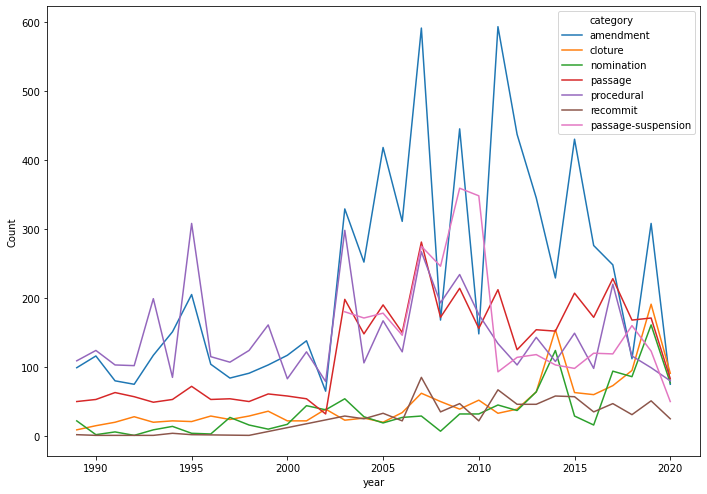

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
tmp = df.groupby(["year", "category"])["category"].agg(Count="count").reset_index().sort_values(by="year", ascending=True)
display(tmp.head(5))

fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

sns.lineplot(x="year", y="Count", data=tmp[(tmp["category"].isin(categories_of_interest))], hue="category", ax=ax)

,year,Count
0,1989,312
1,1990,326
2,1991,280
3,1992,270
4,1993,395
5,1994,329
6,1995,613
7,1996,306
8,1997,298
9,1998,314


Text(0.5, 1.0, '# of votes by year')

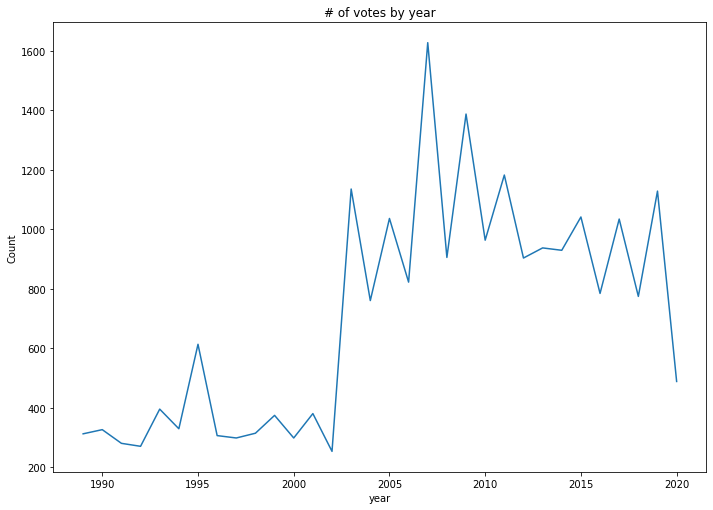

In [51]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

tmp=df.groupby("year")["year"].agg(Count="count").reset_index()
display(tmp)
sns.lineplot(x="year", y="Count", data=tmp, ax=ax)
plt.title("# of votes by year")

We remove the years prior to 2003 where we encountered more errors from the API in order to ypass potential data-quality issues.

In [52]:
df = df[(df["year"] >= 2003) & (df.category.isin(categories_of_interest))]

We find that most votes fall under amendment, procedural, passage, passage-suspension, cloture, nomination, and recommit categories. The other categories jointly make up less than 2% of total votes. Of note here is that there is an "unknown" category, let's take a closer look at that:

In [53]:
df.loc[df["category"]=="unknown",[col for col in df.columns if "vote" not in col]].head(5)

,amendment_author,amendment_number,amendment_purpose,amendment_type,bill_congress,bill_number,bill_title,bill_type,category,chamber,...,session,source_url,subject,treaty_congress,treaty_number,treaty_title,type,updated_at,vp_tie_breaker,year


In [54]:
cnts=df.groupby("category")[[col for col in df.columns if "vote" in col]].sum()
display(cnts)
cols = cnts.columns
cnts.apply(lambda x: set(cols[x.values.nonzero()]), axis=1)

,vote_Aye_D,vote_Aye_I,vote_Aye_R,vote_Guilty_D,vote_Guilty_I,vote_Guilty_R,vote_Nay_D,vote_Nay_I,vote_Nay_R,vote_No_D,...,vote_Not Guilty_R,vote_Not Voting_D,vote_Not Voting_I,vote_Not Voting_R,vote_Present_D,vote_Present_I,vote_Present_R,vote_Yea_D,vote_Yea_I,vote_Yea_R
category,,,,,,,,,,,,,,,,,,,,,
amendment,423891.0,504.0,372917.0,0.0,0.0,0.0,41161.0,903.0,50560.0,364854.0,...,0.0,31707.0,101.0,27760.0,545,3,146,62019.0,1160.0,53034.0
cloture,0.0,0.0,0.0,0.0,0.0,0.0,18011.0,644.0,16468.0,0.0,...,0.0,2353.0,262.0,2635.0,45,1,28,36110.0,1053.0,38967.0
nomination,0.0,0.0,0.0,0.0,0.0,0.0,11718.0,435.0,5340.0,0.0,...,0.0,2322.0,233.0,2338.0,8,0,5,32492.0,944.0,40049.0
passage,77674.0,39.0,186083.0,0.0,0.0,0.0,122657.0,472.0,113401.0,128594.0,...,0.0,20361.0,77.0,19885.0,251,2,316,224757.0,715.0,239767.0
passage-suspension,42504.0,0.0,32476.0,0.0,0.0,0.0,17453.0,88.0,31645.0,463.0,...,0.0,42703.0,72.0,37148.0,751,7,314,553329.0,609.0,535235.0
procedural,24945.0,28.0,28208.0,0.0,0.0,0.0,169516.0,772.0,141579.0,28902.0,...,0.0,19281.0,84.0,17451.0,349,0,542,168506.0,991.0,209651.0
recommit,53486.0,66.0,23888.0,0.0,0.0,0.0,27374.0,26.0,52779.0,27299.0,...,0.0,5093.0,2.0,5213.0,30,1,20,45762.0,54.0,24244.0


category
amendment             {vote_Not Voting_D, vote_Nay_I, vote_No_I, vot...
cloture               {vote_Present_I, vote_Nay_I, vote_Not Voting_R...
nomination            {vote_Nay_I, vote_Not Voting_R, vote_Yea_R, vo...
passage               {vote_Not Voting_D, vote_Nay_I, vote_No_I, vot...
passage-suspension    {vote_Not Voting_D, vote_Nay_I, vote_No_I, vot...
procedural            {vote_Not Voting_D, vote_Nay_I, vote_No_I, vot...
recommit              {vote_Not Voting_D, vote_Nay_I, vote_No_I, vot...
dtype: object

In [55]:
NO_VOTE_PREFIXES = [
    "vote_Present",\
    "vote_Not Voting",\
    "vote_Nay",\
    "vote_No",\
]

YES_VOTE_PREFIXES = [
    "vote_Yea",\
    "vote_Aye"
]

PARTIES = ["R", "D", "I"]

def pct_votes(party, for_or_against):
    possible_arguments = ["for", "against"]
    if for_or_against not in possible_arguments:
        raise Exception(f"Must be one of {possible_arguments}")
    return f"pct {for_or_against} {party} votes"

def total_votes(party, for_or_against_or_total):
    possible_arguments = ["for", "against", "total"]
    if for_or_against_or_total not in possible_arguments:
        raise Exception(f"Must be one of {possible_arguments}")
    if for_or_against_or_total == "total":             
        return f"total {party} votes"
    else:
        return f"total {for_or_against_or_total} {party} votes"

def add_vote_totals_by_party(df):
    for party in PARTIES:
        no_vote_cols = [f"{x}_{party}" for x in NO_VOTE_PREFIXES]
        yes_vote_cols = [f"{x}_{party}" for x in YES_VOTE_PREFIXES]
        no_vote_cols_id = []
        yes_vote_cols_id = []
        df[total_votes(party, "against")] = df.loc[:, np.concatenate((no_vote_cols, no_vote_cols_id))].sum(axis=1)
        df[total_votes(party, "for")] = df.loc[:, np.concatenate((yes_vote_cols, yes_vote_cols_id))].sum(axis=1)
        df[total_votes(party, "total")] = df[total_votes(party, "for")] + df[total_votes(party, "against")]
        df[pct_votes(party, "against")] = df[total_votes(party, "against")] * 100.0 / df[total_votes(party, "total")] 
        df[pct_votes(party, "for")] = df[total_votes(party, "for")] * 100.0 / df[total_votes(party, "total")] 



In [56]:
add_vote_totals_by_party(df)

In [57]:
df.head(5)

,amendment_author,amendment_number,amendment_purpose,amendment_type,bill_congress,bill_number,bill_title,bill_type,category,chamber,...,total against D votes,total for D votes,total D votes,pct against D votes,pct for D votes,total against I votes,total for I votes,total I votes,pct against I votes,pct for I votes
4750,Green of Texas Substitute Amendment,1.0,NaN,h-bill,108.0,743.0,NaN,hr,amendment,h,...,20.0,185.0,205.0,9.756098,90.243902,0.0,1.0,1.0,0.0,100.0
4751,NaN,NaN,NaN,NaN,108.0,743.0,NaN,hr,recommit,h,...,3.0,202.0,205.0,1.463415,98.536585,0.0,1.0,1.0,0.0,100.0
4752,NaN,NaN,NaN,NaN,108.0,743.0,NaN,hr,passage,h,...,29.0,176.0,205.0,14.146341,85.853659,0.0,1.0,1.0,0.0,100.0
4753,NaN,NaN,NaN,NaN,108.0,172.0,NaN,hres,procedural,h,...,205.0,0.0,205.0,100.000000,0.000000,1.0,0.0,1.0,100.0,0.0
4754,NaN,NaN,NaN,NaN,108.0,1559.0,NaN,hr,procedural,h,...,205.0,0.0,205.0,100.000000,0.000000,1.0,0.0,1.0,100.0,0.0


In [58]:
diff_col = "difference_in_vote"
df[diff_col] = np.abs(df[pct_votes("D", "for")] - df[pct_votes("R", "for")])

In [61]:
df.dtypes["year"]

dtype('int64')

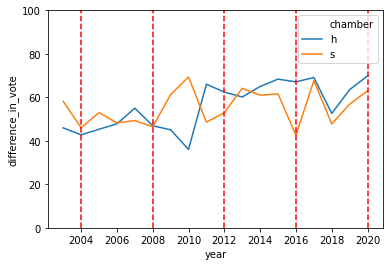

In [70]:
ax = plt.figure().gca()
from matplotlib.ticker import MaxNLocator
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
tmp = df.groupby(["year", "chamber"])[diff_col].mean().reset_index()
sns.lineplot(x="year", y="difference_in_vote", hue=tmp["chamber"], data=tmp)
plt.ylim((0,100))
for i in range(2004, 2024, 4):
    plt.axvline(x=i,c="red", linestyle="--")


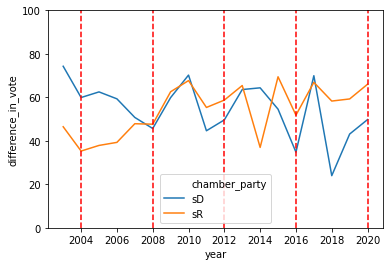

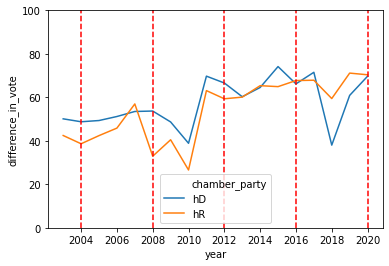

In [85]:
ax = plt.figure().gca()
from matplotlib.ticker import MaxNLocator
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
df["party_in_favor"] = df.apply(lambda row: "D" if row[pct_votes("D", "for")] > row[pct_votes("R", "for")] else "R", axis=1)
tmp = df.groupby(["year", "chamber", "party_in_favor"])[diff_col].mean().reset_index()
tmp["chamber_party"] = tmp["chamber"].astype(str) + tmp["party_in_favor"].astype(str)
sns.lineplot(x="year", y="difference_in_vote", hue=tmp.loc[tmp["chamber"]=="s","chamber_party"], data=tmp[tmp["chamber"]=="s"])
plt.ylim((0,100))
for i in range(2004, 2024, 4):
    plt.axvline(x=i,c="red", linestyle="--")
plt.show()

ax = plt.figure().gca()
from matplotlib.ticker import MaxNLocator
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
sns.lineplot(x="year", y="difference_in_vote", hue=tmp.loc[tmp["chamber"]=="h","chamber_party"], data=tmp[tmp["chamber"]=="h"])
plt.ylim((0,100))
for i in range(2004, 2024, 4):
    plt.axvline(x=i,c="red", linestyle="--")
plt.show()



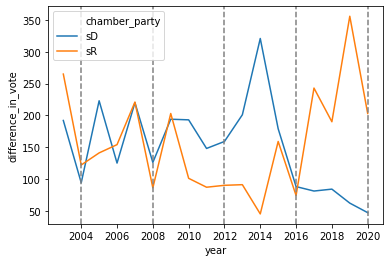

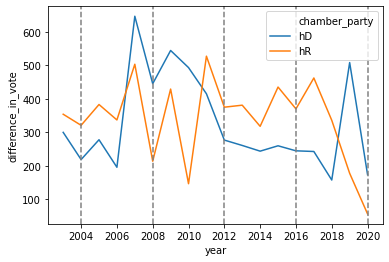

In [93]:
ax = plt.figure().gca()
from matplotlib.ticker import MaxNLocator
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
df["party_in_favor"] = df.apply(lambda row: "D" if row[pct_votes("D", "for")] > row[pct_votes("R", "for")] else "R", axis=1)
tmp = df.groupby(["year", "chamber", "party_in_favor"])[diff_col].count().reset_index()
tmp["chamber_party"] = tmp["chamber"].astype(str) + tmp["party_in_favor"].astype(str)
sns.lineplot(x="year", y="difference_in_vote", hue=tmp.loc[tmp["chamber"]=="s","chamber_party"], data=tmp[tmp["chamber"]=="s"])
for i in range(2004, 2024, 4):
    plt.axvline(x=i,c="gray", linestyle="--")
plt.show()

ax = plt.figure().gca()
from matplotlib.ticker import MaxNLocator
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
sns.lineplot(x="year", y="difference_in_vote", hue=tmp.loc[tmp["chamber"]=="h","chamber_party"], data=tmp[tmp["chamber"]=="h"])
for i in range(2004, 2024, 4):
    plt.axvline(x=i,c="gray", linestyle="--")
plt.show()



In [ ]:
df.columns

In [91]:
df.columns

Index(['amendment_author', 'amendment_number', 'amendment_purpose',
       'amendment_type', 'bill_congress', 'bill_number', 'bill_title',
       'bill_type', 'category', 'chamber', 'congress', 'date', 'file_name',
       'nomination_number', 'nomination_title', 'number', 'question',
       'record_modified', 'requires', 'result', 'result_text', 'session',
       'source_url', 'subject', 'treaty_congress', 'treaty_number',
       'treaty_title', 'type', 'updated_at', 'vote_Aye_D', 'vote_Aye_I',
       'vote_Aye_R', 'vote_Guilty_D', 'vote_Guilty_I', 'vote_Guilty_R',
       'vote_Nay_D', 'vote_Nay_I', 'vote_Nay_R', 'vote_No_D', 'vote_No_I',
       'vote_No_R', 'vote_Not Guilty_D', 'vote_Not Guilty_I',
       'vote_Not Guilty_R', 'vote_Not Voting_D', 'vote_Not Voting_I',
       'vote_Not Voting_R', 'vote_Present_D', 'vote_Present_I',
       'vote_Present_R', 'vote_Yea_D', 'vote_Yea_I', 'vote_Yea_R', 'vote_id',
       'vp_tie_breaker', 'year', 'total against R votes', 'total for R votes',


In [29]:
def q1(x):
    return x.quantile(0.25)

def q2(x):
    return x.median()

def q3(x):
    return x.quantile(0.75)

tmp=df.groupby("year")[diff_col].agg(Avg="mean", P25=q1, P50=q2, P75=q3).reset_index()

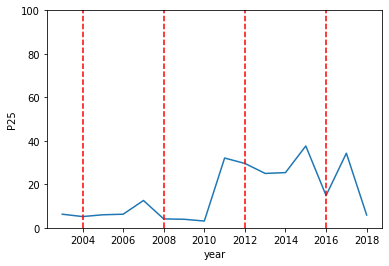

In [30]:
sns.lineplot(x="year", y="P25", data=tmp)
plt.ylim((0,100))
for i in range(2004, 2020, 4):
    plt.axvline(x=i,c="red", linestyle="--")

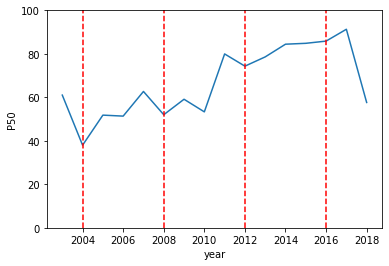

In [31]:
sns.lineplot(x="year", y="P50", data=tmp)
plt.ylim((0,100))
for i in range(2004, 2020, 4):
    plt.axvline(x=i,c="red", linestyle="--")

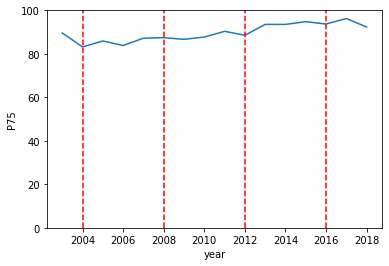

In [32]:
sns.lineplot(x="year", y="P75", data=tmp)
plt.ylim((0,100))
for i in range(2004, 2020, 4):
    plt.axvline(x=i,c="red", linestyle="--")